In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [179]:
archivo_tsv = '/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/opiniones_de_clientes/para_borrar.tsv'

opiniones2 = pd.read_csv(archivo_tsv, sep='\t')
opiniones2 = opiniones2.drop(columns = ["Customer Value", "id", "¿Por que?", "Date of 1st Feedback Call", "Resultado del Primer contacto", "Descripción detallada del contacto", "Fuiste capaz de resolver el inconveniente?", "Probabilidad de Recomendación"])
opiniones2

,Fecha de respuesta,Edad,El cliente se encontró satisfecho con el resultado?
0,6/30/19 23:09,43,NaN
1,6/30/19 22:56,75,NaN
2,6/30/19 22:52,23,NaN
3,6/30/19 22:33,71,NaN
4,6/30/19 22:25,64,NaN
...,...,...,...
35821,1/1/19 8:48,63,NaN
35822,1/1/19 3:40,35,No
35823,1/1/19 2:04,41,NaN
35824,1/1/19 1:07,66,NaN


___

# 2) ¿Cuál es la de edad en dónde la cantidad de clientes que dijeron que 'Sí' quedaron satisfechos con el resultado es mayor?

In [180]:
clientes_satisfechos = opiniones2[opiniones2['El cliente se encontró satisfecho con el resultado?'] == 'Sí']
clientes_satisfechos

,Fecha de respuesta,Edad,El cliente se encontró satisfecho con el resultado?
5,6/30/19 21:19,56,Sí
6,6/30/19 20:53,33,Sí
9,6/30/19 19:54,50,Sí
16,6/30/19 14:47,52,Sí
38,6/29/19 20:15,44,Sí
...,...,...,...
35657,1/3/19 10:42,36,Sí
35673,1/3/19 10:37,33,Sí
35689,1/2/19 23:09,39,Sí
35728,1/2/19 14:04,65,Sí


In [181]:
moda_edad = clientes_satisfechos['Edad'].mode()
moda_edad

0    39
Name: Edad, dtype: object

In [182]:
cantidad_moda = clientes_satisfechos[clientes_satisfechos['Edad'] == moda_edad.iloc[0]]['Edad'].count()
cantidad_moda

61

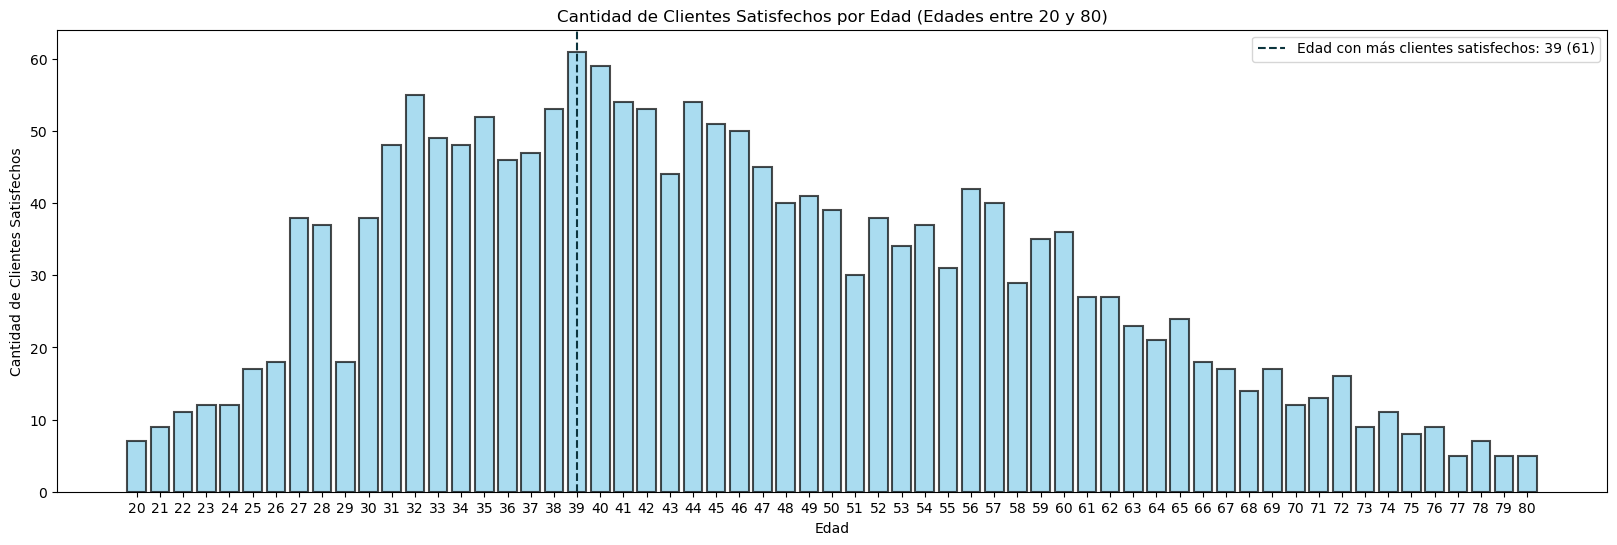

In [183]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que "opiniones2" es tu DataFrame original
# Filtra los clientes que dijeron 'Sí'
clientes_satisfechos = opiniones2[opiniones2["El cliente se encontró satisfecho con el resultado?"] == 'Sí']

# Cuenta la cantidad de clientes satisfechos por edad
clientes_satisfechos_por_edad = clientes_satisfechos.groupby("Edad")["El cliente se encontró satisfecho con el resultado?"].count()

# Encuentra la edad con la mayor cantidad de clientes satisfechos
edad_max_satisfechos = clientes_satisfechos_por_edad.idxmax()
max_satisfechos = clientes_satisfechos_por_edad.max()

# Filtra las edades entre 20 y 80 (convirtiéndolas a enteros)
clientes_satisfechos_por_edad_filtrado = clientes_satisfechos_por_edad[(clientes_satisfechos_por_edad.index.astype(int) >= 20) & (clientes_satisfechos_por_edad.index.astype(int) <= 80)]

# Crea un gráfico de barras para mostrar la cantidad de clientes satisfechos por edad (filtrado)
plt.figure(figsize=(20, 6))
plt.bar(clientes_satisfechos_por_edad_filtrado.index, clientes_satisfechos_por_edad_filtrado, color='skyblue', edgecolor='black', alpha=0.7, linewidth=1.5)
plt.xlabel("Edad")
plt.ylabel("Cantidad de Clientes Satisfechos")
plt.title("Cantidad de Clientes Satisfechos por Edad (Edades entre 20 y 80)")
plt.axvline(x=edad_max_satisfechos, color='#0c343d', linestyle='--', label=f"Edad con más clientes satisfechos: {edad_max_satisfechos} ({max_satisfechos})")
plt.legend()
plt.show()


___

    ➢ Conclusión:

    Como se puede observar en el gráfico, La edad en la que más gente quedó con la cuesta es de 39 años, con 61 clientes

___

    ➢ Con respecto a esta pregunta, pudimos notar 1 tipo de sesgo:

    1) Sesgo de respuesta: Solo se incluyen respuestas 'Sí', lo que puede sesgar la percepción general de satisfacción si no se incluyen respuestas 'No' u otras opciones.